In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import time as dt
from functools import reduce


class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))

    def optimize(self, X, y, start_b, n_iters):
            b = start_b.copy()
            errors = []
            steps = []
            step = 0
            for i in range(n_iters):
                b_grad = self.grad_func(X, y, b)
                errors.append(b_grad)
                steps.append(step)
                step += 1
                b = self.gradient_step(b, b_grad)
            plt.plot(steps, errors, 'g')
            plt.show()
            return b


    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    def plot_data(self, X):
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
        plt.show()
        
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')
        
    def plot_classified_data(self, X):
        xx, yy = np.meshgrid(
            np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
            np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
        Z = self.predict_proba(XX)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

In [21]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [22]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


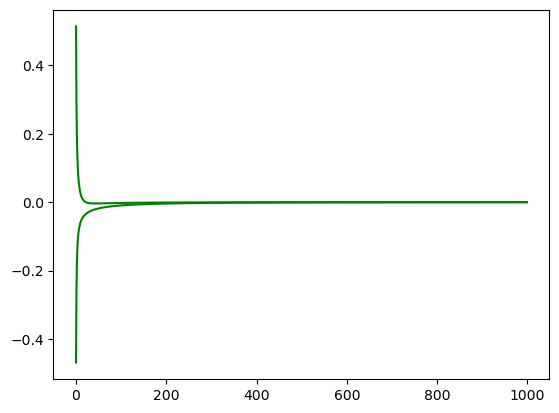

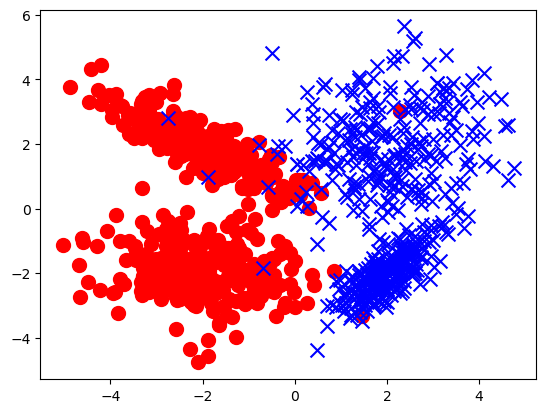

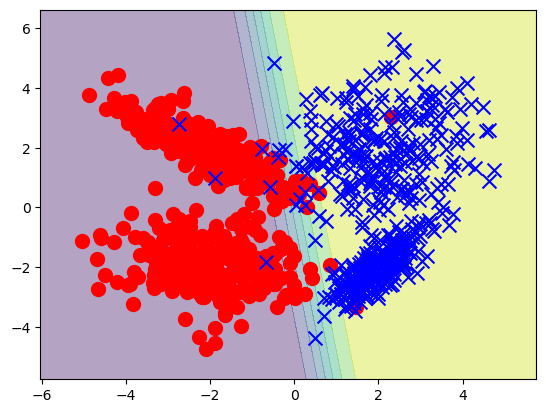

accuracy = 0.98
F1-score = 0.98


In [23]:
logreg = LogReg()

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

# 1 Выведите результаты работы библиотечной модели - в численном и в графическом виде.

0.976

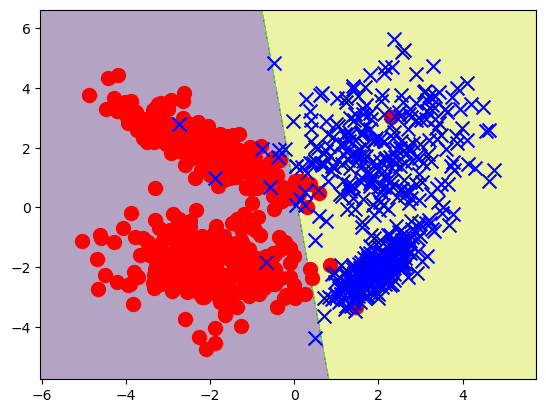

In [24]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)



model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

display(model.score(X,y))

xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))


XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = model.predict(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

# 2 Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

C:\Users\ivant\AppData\Local\Temp\ipykernel_9112\600972208.py:50: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


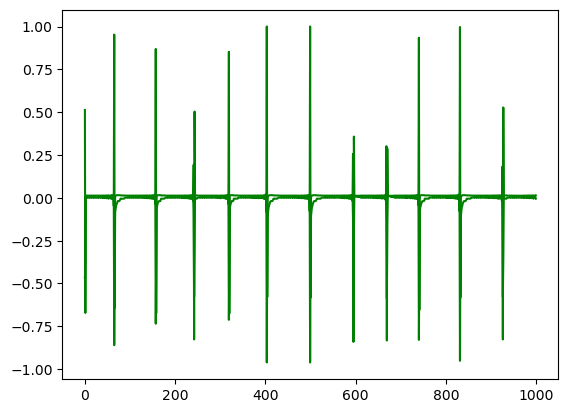

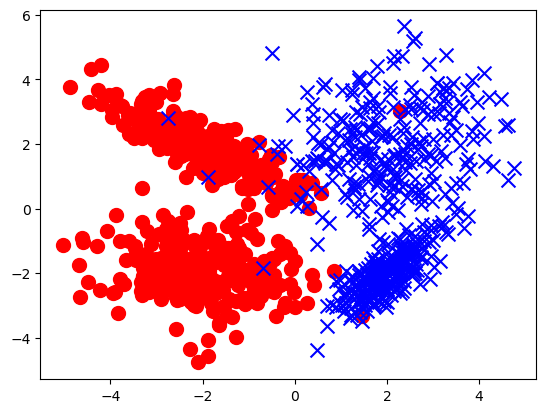

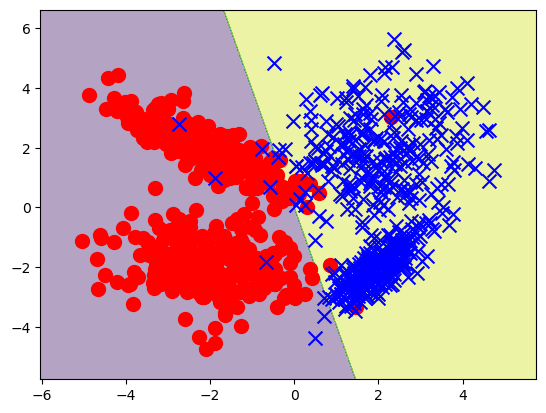

accuracy = 0.98
F1-score = 0.98


In [25]:
logreg = LogReg(alpha=10000)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

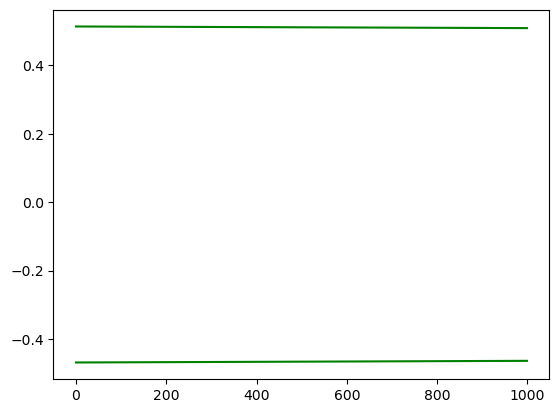

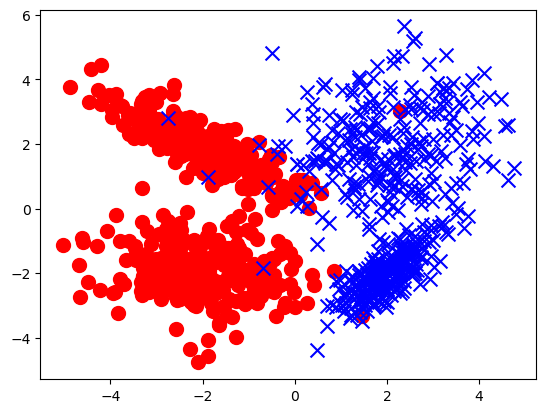

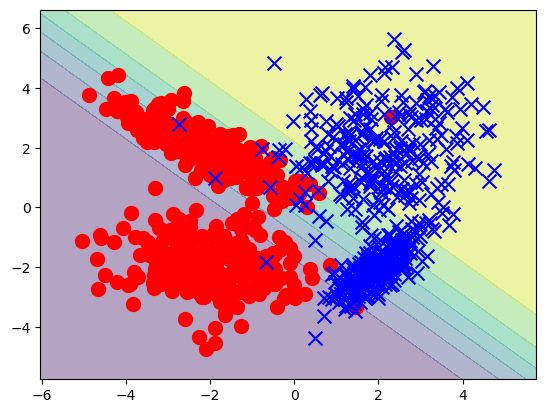

accuracy = 0.75
F1-score = 0.75


In [26]:
logreg = LogReg(alpha=0.00001)

X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logreg.fit(X, y)
y_pred = logreg.predict(X)
logreg.plot_data(X)
plt.show()
logreg.plot_classified_data(X)
plt.show()
logreg.score(X,y)

# 3 Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [27]:
class SGD():
    def __init__(self,X,Y, alpha=0.5, n_iters=1000):
        self.X=X
        self.Y=Y
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.fit()
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, start_b, n_iters):
            self.b = start_b.copy()
            errors = []
            steps = []
            step = 0
            for i in range(n_iters):
                b_grad = self.grad_func()
                errors.append(b_grad)
                steps.append(step)
                step += 1
                self.b = self.gradient_step(self.b, b_grad)
            plt.plot(steps, errors, 'g')
            plt.show()
            self.b=self.b
            
    
    def fit(self):
        self.X = np.hstack([np.ones(self.X.shape[0])[:, np.newaxis], self.X])
        m = self.X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(start_b, self._n_iters)
        return self.X
        
        
class LogReg(SGD):
    def sigmoid(self):
        try:
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
            self.last_b=self.b
        except:
            self.b=self.last_b
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
        return res
    
    def grad_func(self):
        n = self.X.shape[0]
        grad = 1. / n * self.X.transpose().dot(self.sigmoid() - self.Y)
        return grad
    
    def predict_proba(self):
        return self.sigmoid()
    
    def predict(self):
        y_pred = self.predict_proba() > 0.5
        return y_pred
    
    def score(self):
        y_pred=self.predict()
        ac = accuracy_score(self.Y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')
    
    def plot_data(self, X):
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
        plt.show()
    
    def plot_classified_data(self, X):
        xx, yy = np.meshgrid(
            np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
            np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
        Z = self.predict_proba(XX)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import time as dt
from functools import reduce


class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))

    def optimize(self, X, y, start_b, n_iters):
            b = start_b.copy()
            errors = []
            steps = []
            step = 0
            for i in range(n_iters):
                b_grad = self.grad_func(X, y, b)
                errors.append(b_grad)
                steps.append(step)
                step += 1
                b = self.gradient_step(b, b_grad)
            plt.plot(steps, errors, 'g')
            plt.show()
            return b


    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
        
        
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred
    
    def plot_data(self, X):
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
        plt.show()
        
    def score(self,X,y):
        y_pred=self.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')
        
    def plot_classified_data(self, X):
        xx, yy = np.meshgrid(
            np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
            np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
        Z = self.predict_proba(XX)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

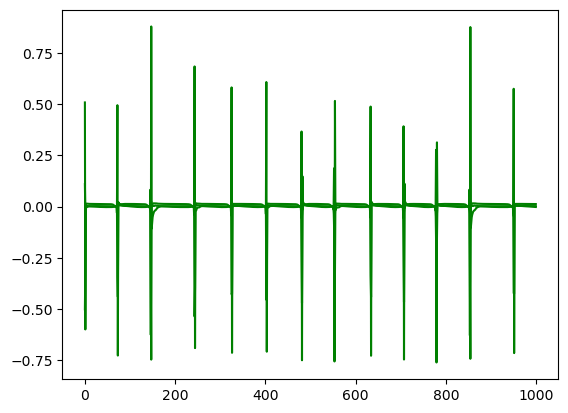

TypeError: LogReg.predict_proba() takes 1 positional argument but 2 were given

In [28]:


X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

logreg = LogReg(X,y,alpha=91)
logreg.plot_classified_data(X)
logreg.predict()
logreg.score()

# 4 Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

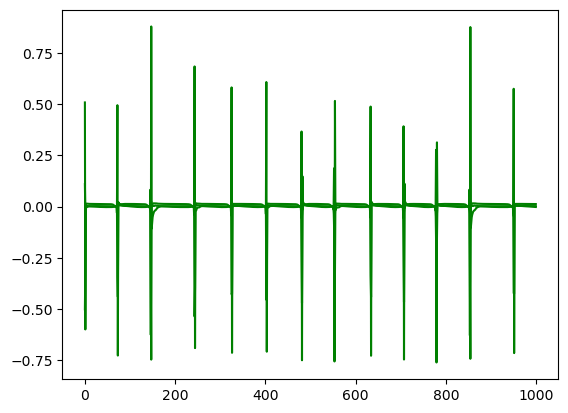

accuracy = 0.98
F1-score = 0.98
2


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


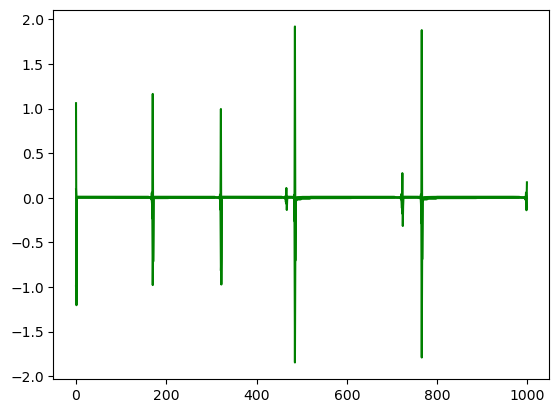

accuracy = 0.96
F1-score = 0.96
4


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


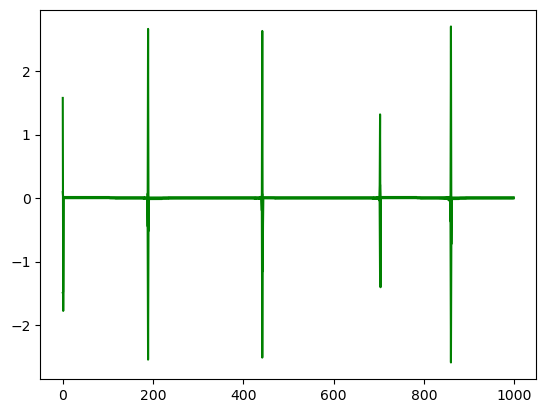

accuracy = 1.00
F1-score = 1.00
6


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


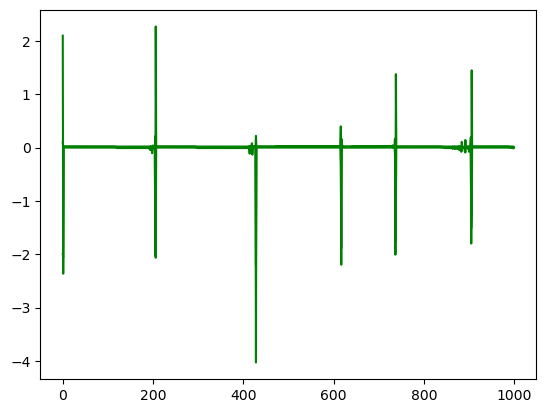

accuracy = 0.99
F1-score = 1.00
8


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


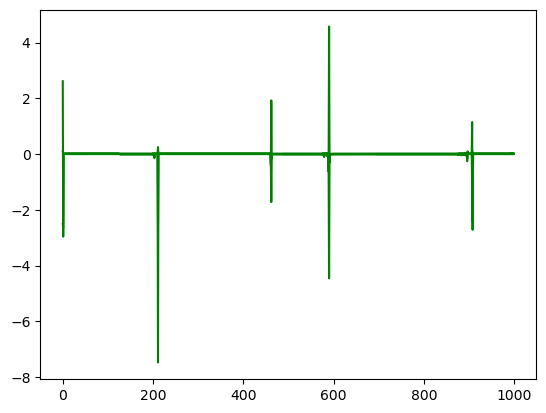

accuracy = 1.00
F1-score = 1.00
10


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


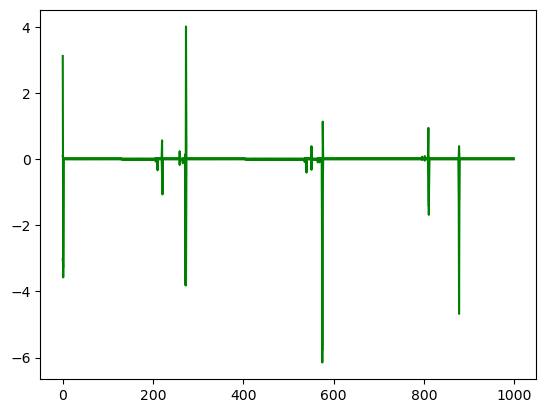

C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


accuracy = 1.00
F1-score = 1.00
12


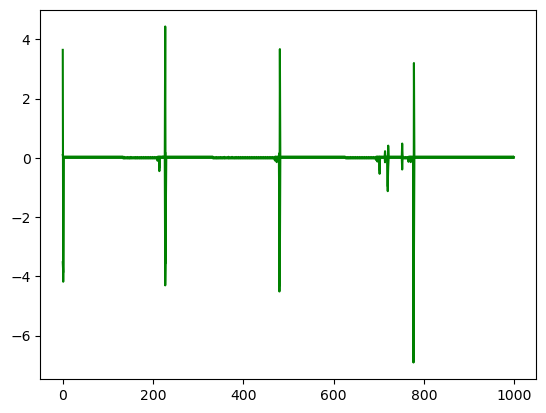

C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


accuracy = 1.00
F1-score = 1.00
14


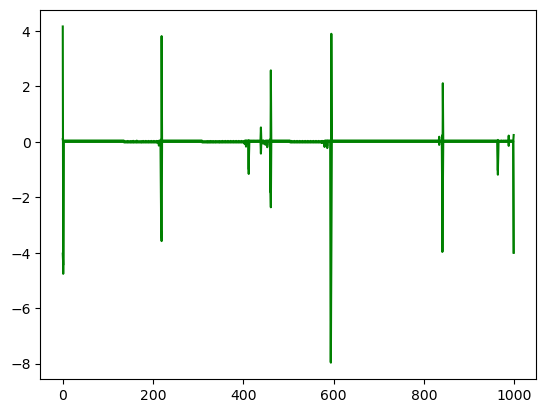

accuracy = 0.75
F1-score = 0.80
16


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


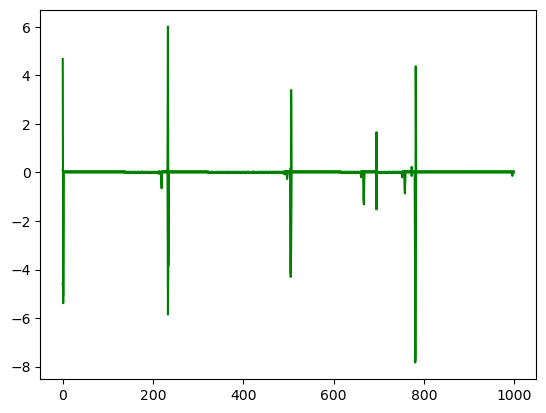

C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))
C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:41: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


accuracy = 1.00
F1-score = 1.00
18


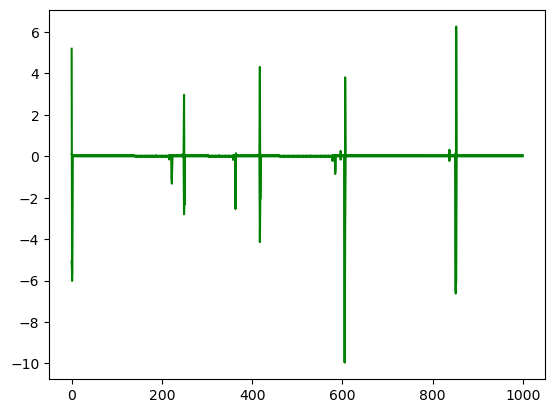

accuracy = 1.00
F1-score = 1.00
20


C:\Users\ivant\AppData\Local\Temp\ipykernel_28292\3247529250.py:45: RuntimeWarning: overflow encountered in exp
  res = 1. / (1. + np.exp(-self.X.dot(self.b)))


In [ ]:
for i in range(2,21,2):
    X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=i,
                            random_state=1)
    logreg = LogReg(X,y,alpha=91)
    logreg.predict()
    logreg.score()
    #logreg.plot_data(X)
    plt.show()
    logreg.plot_classified_data(X)
    plt.show()
    #logreg.score(X,y)
    print(i)

Чем больше параметр `class_sep`, тем кучнее расположены данные

# 5 Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

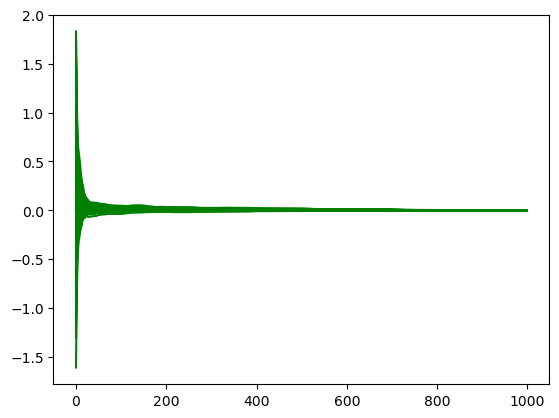

accuracy = 1.00
F1-score = 1.00


In [ ]:
class SGD():
    def __init__(self,X,Y, alpha=0.5, n_iters=1000):
        self.X=X
        self.Y=Y
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.fit()
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, start_b, n_iters):
            self.b = start_b.copy()
            errors = []
            steps = []
            step = 0
            for i in range(n_iters):
                b_grad = self.grad_func()
                errors.append(b_grad)
                steps.append(step)
                step += 1
                self.b = self.gradient_step(self.b, b_grad)
            plt.plot(steps, errors, 'g')
            plt.show()
            self.b=self.b
            
    
    def fit(self):
        self.X = np.hstack([np.ones(self.X.shape[0])[:, np.newaxis], self.X])
        m = self.X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(start_b, self._n_iters)
        return self.X
        
        
class LogReg(SGD):
    def sigmoid(self):
        try:
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
            self.last_b=self.b
        except:
            self.b=self.last_b
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
        return res
    
    def grad_func(self):
        n = self.X.shape[0]
        grad = 1. / n * self.X.transpose().dot(self.sigmoid() - self.Y)
        return grad
    
    def predict_proba(self):
        return self.sigmoid()
    
    def predict(self):
        y_pred = self.predict_proba() > 0.5
        
        return y_pred
    
    def score(self):
        y_pred=self.predict()
        ac = accuracy_score(self.Y, y_pred)
        f1 = f1_score(y, y_pred,average='micro')
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')


X,y = make_classification (n_samples=1000,
                          n_features=100,
                          n_informative=100,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=4,
                          random_state=1)
logreg = LogReg(X,y,alpha=0.1)
logreg.predict()
logreg.score()

# 6 Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

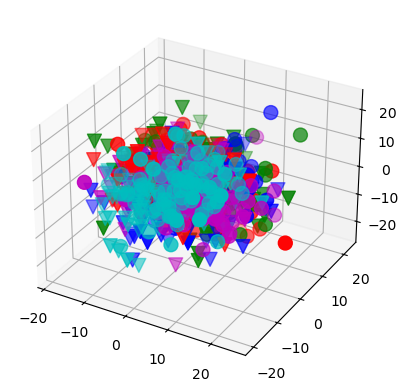

array([6, 3, 9, 3, 0, 7, 5, 8, 3, 5, 4, 6, 3, 7, 4, 1, 2, 5, 2, 9, 3, 0,
       8, 4, 9, 2, 6, 5, 9, 1, 0, 3, 4, 3, 2, 1, 5, 9, 7, 2, 7, 1, 7, 8,
       1, 3, 6, 8, 8, 7, 2, 1, 2, 4, 1, 7, 5, 9, 9, 3, 3, 1, 4, 5, 4, 3,
       4, 3, 6, 8, 7, 8, 5, 0, 8, 6, 6, 3, 6, 4, 4, 8, 7, 7, 0, 9, 8, 4,
       7, 5, 7, 6, 1, 4, 8, 1, 0, 8, 3, 3, 7, 7, 1, 1, 9, 6, 8, 1, 5, 3,
       7, 4, 0, 9, 4, 5, 3, 1, 7, 6, 6, 8, 6, 4, 8, 5, 8, 8, 5, 3, 7, 1,
       8, 9, 6, 1, 1, 9, 5, 1, 0, 9, 5, 2, 0, 7, 2, 5, 2, 5, 1, 0, 9, 8,
       2, 2, 2, 6, 5, 3, 9, 2, 7, 4, 8, 8, 7, 9, 1, 0, 8, 6, 6, 4, 8, 7,
       9, 6, 2, 2, 3, 9, 4, 5, 4, 6, 9, 8, 7, 2, 0, 5, 6, 2, 0, 3, 2, 6,
       4, 9, 4, 5, 1, 0, 2, 2, 8, 1, 9, 9, 7, 6, 0, 5, 2, 7, 2, 8, 7, 1,
       8, 9, 0, 6, 4, 8, 5, 9, 8, 7, 1, 0, 3, 7, 0, 7, 2, 3, 9, 8, 7, 0,
       8, 6, 7, 9, 5, 8, 2, 0, 9, 9, 4, 7, 6, 3, 4, 9, 8, 0, 4, 5, 6, 9,
       4, 8, 9, 8, 1, 3, 8, 1, 7, 7, 3, 2, 5, 9, 0, 9, 8, 1, 6, 4, 7, 7,
       3, 6, 0, 9, 7, 0, 6, 6, 0, 0, 1, 1, 2, 7, 0,

In [ ]:
class SGD():
    def __init__(self,X,Y, alpha=0.5, n_iters=1000):
        self.X=X
        self.Y=Y
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.fit()
        
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, start_b, n_iters):
            self.b = start_b.copy()
            errors = []
            steps = []
            step = 0
            for i in range(n_iters):
                b_grad = self.grad_func()
                errors.append(b_grad)
                steps.append(step)
                step += 1
                self.b = self.gradient_step(self.b, b_grad)
            self.b=self.b
            
    
    def fit(self):
        self.X = np.hstack([np.ones(self.X.shape[0])[:, np.newaxis], self.X])
        m = self.X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(start_b, self._n_iters)
        return self.X
        
        
class LogReg(SGD):
    def sigmoid(self):
        try:
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
            self.last_b=self.b
        except:
            self.b=self.last_b
            res = 1. / (1. + np.exp(-self.X.dot(self.b)))
        return res
    
    def grad_func(self):
        n = self.X.shape[0]
        grad = 1. / n * self.X.transpose().dot(self.sigmoid() - self.Y)
        return grad
    
    def predict_proba(self):
        return self.sigmoid()
    
    def predict(self):
        y_pred = self.predict_proba() > 0.5
        
        return y_pred
    
    def score(self):
        y_pred=self.predict()
        ac = accuracy_score(self.Y, y_pred)
        f1 = f1_score(y, y_pred,average='micro')
        print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')



X,y = make_classification (n_samples=1000,
                          n_features=100,
                          n_informative=100,
                          n_redundant=0,
                          n_classes=10,
                          class_sep=4,
                          random_state=1)


def predict(X, y,colors,markers):
    n_classes = len(set(y))
    classes_proba = []
    y_all_classes = y
    for n in range(n_classes):
        converter_num = lambda x: int(x==n)
        y_single_class = [converter_num(x) for x in y_all_classes]
        logreg = LogReg(X, y_single_class)
        y_pred_proba = logreg.predict_proba()
        classes_proba.append(y_pred_proba)
        
    classes_proba = np.array(classes_proba).transpose()
    classes_proba_rez = classes_proba.argmax(axis=1)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    cm=[(a, b) for a in colors for b in markers ]
    for n in range(n_classes):
        ax.scatter(X[:, 0][y==n], X[:, 1][y==n],X[:, 2][y==n],marker=cm[n][1], c=cm[n][0], s=100)
    plt.show()
    return classes_proba_rez

predict(X,y,list('bgrcmykw'),list('vo'))

# 7 Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [ ]:
X,y = make_classification (n_samples=1000,
                          n_features=100,
                          n_informative=100,
                          n_redundant=0,
                          n_classes=10,
                          class_sep=4,
                          random_state=1)

model = LogisticRegression()
model.fit(X, y)
pd.DataFrame(model.predict_proba(X))

,0,1,2,3,4,5,6,7,8,9
0,1.271080e-08,1.323806e-09,4.183313e-09,2.535246e-08,1.654922e-08,2.148977e-07,9.999993e-01,3.654902e-07,1.889736e-08,7.847623e-09
1,1.772004e-07,4.548068e-10,5.636615e-09,9.999520e-01,2.097764e-07,6.679966e-08,1.470389e-07,4.734823e-05,3.161409e-11,1.343938e-09
2,1.260399e-11,5.574699e-08,9.036465e-07,3.456164e-05,4.291283e-04,1.074906e-05,1.873836e-08,4.384562e-08,1.384193e-06,9.995232e-01
3,2.210113e-04,1.002489e-05,5.387537e-07,9.992987e-01,3.127450e-04,2.444363e-05,1.251361e-04,3.306496e-08,4.082152e-06,3.238969e-06
4,9.991293e-01,5.381903e-05,1.635370e-05,8.614619e-07,8.240980e-06,1.302648e-05,2.756553e-04,4.927098e-04,8.611421e-06,1.470058e-06
...,...,...,...,...,...,...,...,...,...,...
995,8.751102e-07,9.995485e-01,1.964368e-05,2.039622e-06,9.387330e-05,1.937640e-06,1.135971e-06,4.706599e-07,3.312782e-04,2.763007e-07
996,5.831069e-05,3.876881e-08,1.360197e-05,1.393153e-04,2.897537e-09,1.101416e-05,9.986853e-01,4.821077e-07,1.091934e-03,1.357200e-08
997,1.684734e-05,9.999017e-01,1.437866e-06,5.373617e-06,5.812460e-09,1.936135e-08,4.024051e-06,6.160480e-05,2.287954e-07,8.794336e-06
998,9.999501e-01,2.271295e-06,1.696751e-10,1.155186e-07,1.830261e-05,3.540347e-06,2.086246e-05,3.107202e-06,1.737560e-06,7.634967e-11
